In [28]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [29]:
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"]
data = pd.read_csv("./Dataset/auto_mpg/auto-mpg.data",sep=r'\s+', header=None, names=column_names)
data.drop('car_name', axis=1, inplace = True)
data.dropna(inplace = True)
data.reset_index(inplace = True)
data = data[pd.to_numeric(data['horsepower'], errors = 'coerce').notnull()]
data['horsepower'] = data.horsepower.astype('float64')
data = (data - data.mean()) / data.std()

In [30]:
data.head()

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,-1.725060,-0.697747,1.482053,1.075915,0.663285,0.619748,-1.283618,-1.623241,-0.715726
1,-1.716329,-1.082115,1.482053,1.486832,1.572585,0.842258,-1.464852,-1.623241,-0.715726
2,-1.707598,-0.697747,1.482053,1.181033,1.182885,0.539692,-1.646086,-1.623241,-0.715726
3,-1.698867,-0.953992,1.482053,1.047246,1.182885,0.536160,-1.283618,-1.623241,-0.715726
4,-1.690136,-0.825870,1.482053,1.028134,0.923085,0.554997,-1.827320,-1.623241,-0.715726


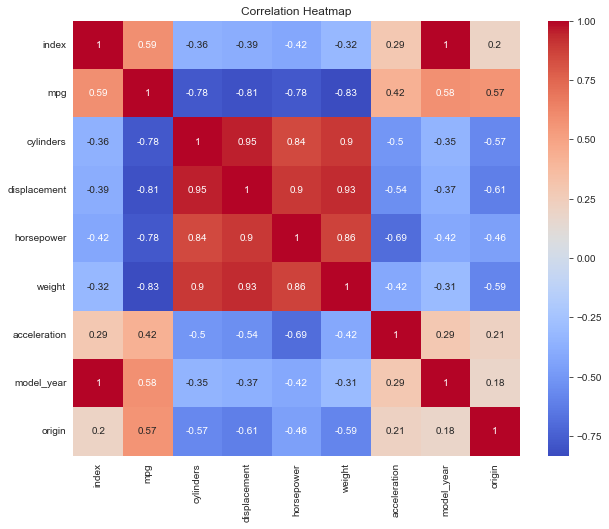

In [31]:
plt.figure(figsize = (10, 8))
correlations = data.corr()
sns.heatmap(correlations, annot = True, cmap = "coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [32]:
import statsmodels.api as sm

input_features = ['weight', 'cylinders', 'displacement']
target_feature = 'horsepower'

X = data[input_features]
Y = data[target_feature]

X = sm.add_constant(X)
model = sm.OLS(Y.astype(float), X.astype(float)).fit()

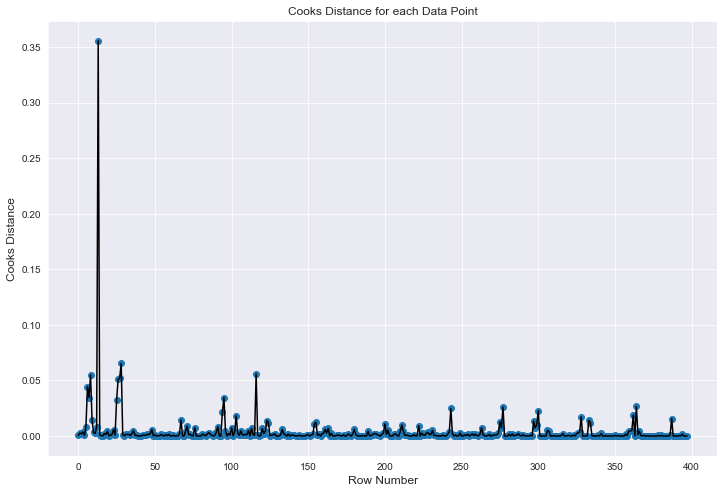

In [33]:
influence = model.get_influence()
cooks_dist = influence.cooks_distance
mean_dist = np.mean(cooks_dist[0])

plt.figure(figsize = (12, 8))
plt.scatter(data.index, cooks_dist[0])
plt.plot(data.index, cooks_dist[0], color='black')
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Cooks Distance', fontsize = 12)
plt.title('Cooks Distance for each Data Point')
plt.show()

In [34]:
data1 = data[['cylinders', 'weight', 'displacement', 'horsepower']]
influential_points = data1.index[cooks_dist[0] > (4 * mean_dist)]
print("INFLUENTIAL POINTS")
data1.iloc[influential_points, :]

INFLUENTIAL POINTS


,cylinders,weight,displacement,horsepower
6,1.482053,1.620452,2.480677,3.001484
7,1.482053,1.571005,2.346890,2.871584
8,1.482053,1.704040,2.490234,3.131384
13,1.482053,0.127638,2.490234,3.131384
25,1.482053,1.927726,1.582394,2.871584
26,1.482053,1.646352,1.075915,2.481884
27,1.482053,1.653416,1.181033,2.741684
28,1.482053,2.065470,1.047246,2.300025
95,1.482053,2.323299,2.490234,3.131384
96,1.482053,0.992952,1.582394,1.832385


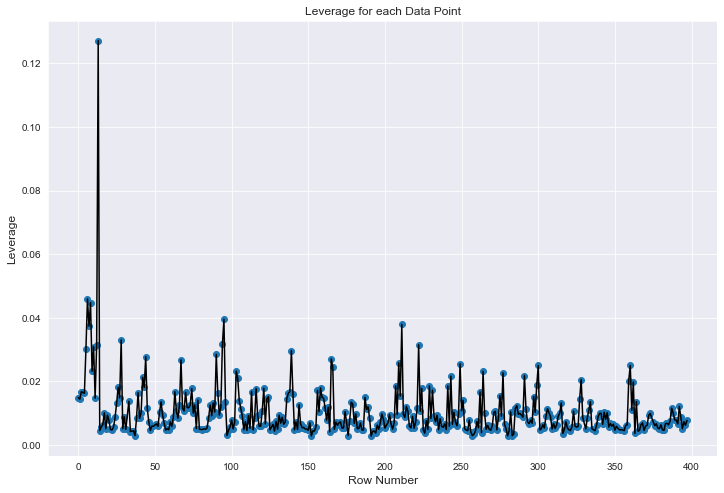

In [35]:
lev = influence.hat_matrix_diag
mean_lev = np.mean(lev)

plt.figure(figsize = (12, 8))
plt.scatter(data.index, lev)
plt.plot(data.index, lev, color = 'black')
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Leverage', fontsize = 12)
plt.title('Leverage for each Data Point')
plt.show()

In [36]:
leverage_points = data1.index[lev > (4 * mean_lev)]
print("LEVERAGE POINTS")
data1.iloc[leverage_points, :]

LEVERAGE POINTS


,cylinders,weight,displacement,horsepower
6,1.482053,1.620452,2.480677,3.001484
8,1.482053,1.704040,2.490234,3.131384
13,1.482053,0.127638,2.490234,3.131384


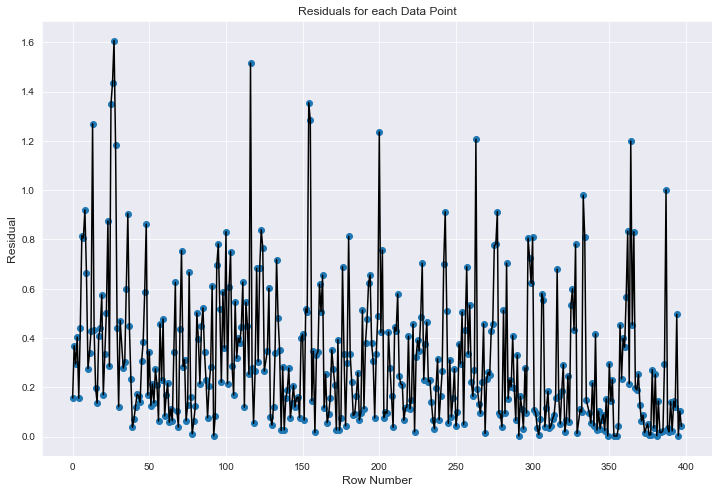

In [37]:
residuals = np.abs(model.resid)
mean_res = np.mean(residuals)

plt.figure(figsize = (12, 8))
plt.scatter(data.index, residuals)
plt.plot(data.index, residuals, color = 'black')
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Residual', fontsize = 12)
plt.title('Residuals for each Data Point')
plt.show()

In [38]:
outlier_points = data1.index[residuals > (3 * mean_res)]
print("OUTLIER POINTS")
data1.iloc[outlier_points, :]

OUTLIER POINTS


,cylinders,weight,displacement,horsepower
13,1.482053,0.127638,2.490234,3.131384
25,1.482053,1.927726,1.582394,2.871584
26,1.482053,1.646352,1.075915,2.481884
27,1.482053,1.653416,1.181033,2.741684
28,1.482053,2.065470,1.047246,2.300025
117,-0.862911,-1.307489,-1.208019,-1.441094
156,1.482053,1.990123,1.964642,1.702485
157,1.482053,1.721699,1.486832,1.052985
202,0.309571,0.253609,0.607660,-0.246015
265,1.482053,1.297872,1.181033,0.923085
